In [10]:
import pandas as pd
import random
import numpy
from IPython.display import HTML
from matplotlib import pylab
from matplotlib import pyplot as plt
from IPython.display import Image



In [11]:
HTML('<h2> Understanding Experimental Data(cont.)')

In [6]:
# display(HTML('''<img src="dist1.png" style = "width:600px;height:300px;">'''))

HTML('''
<li> Previous lecture outlined how to fit models to data.</li>
<li> This lecture considers how we validate models.</li>  
''')

In [13]:
HTML('<h2> Recap: Linear and Quadratic model fits')

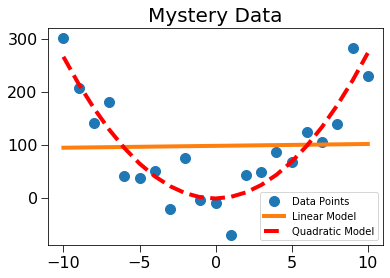

In [14]:

#Demonstration using mystery data

xVals, yVals = getData('mysteryData.txt')
pylab.plot(xVals, yVals, 'o', label = 'Data Points')
pylab.title('Mystery Data')

#Try linear model
model1 = pylab.polyfit(xVals, yVals, 1)
pylab.plot(xVals, pylab.polyval(model1, xVals),
          label = 'Linear Model')

#Try a quadratic model
model2 = pylab.polyfit(xVals, yVals, 2)
pylab.plot(xVals, pylab.polyval(model2, xVals),
          'r--', label = 'Quadratic Model')
pylab.legend()

In [16]:
# display(HTML('''<img src="dist1.png" style = "width:600px;height:300px;">'''))

HTML('''
<li> If we fit higher order polynomials do we get a better fit? </li>
<li> Unless we have a theory for why data should be linear, use coefficient of determination R^2. </li>

''')

In [18]:
display(HTML('''<p>Co-efficient of determination:</p>'''))

HTML('''<img src="cod.png" style = "width:600px;height:150px;">''')

In [20]:
display(HTML('''<p>Comparing Higher order fits:</p>'''))


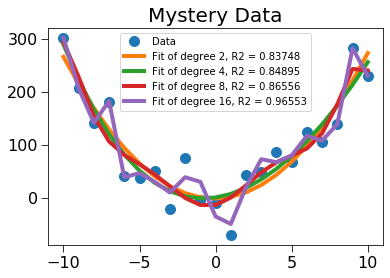

In [22]:
#Compare higher-order fits
degrees = (2, 4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

In [27]:
display(HTML('''
<p> Good model both explains phenomena and helps make good predictions.</p>
'''))

In [29]:
#Mystery data generated using:
def genNoisyParabolicData(a, b, c, xVals, fName):
    yVals = []
    for x in xVals:
        theoreticalVal = a*x**2 + b*x + c
        yVals.append(theoreticalVal\
        + random.gauss(0, 35))
    f = open(fName,'w')
    f.write('x        y\n')
    for i in range(len(yVals)):
        f.write(str(yVals[i]) + ' ' + str(xVals[i]) + '\n')
    f.close()
    
display(HTML('''<p> If data generated from a degree 2 polynomial, why is 16th order polynomial best fit?</p>'''))

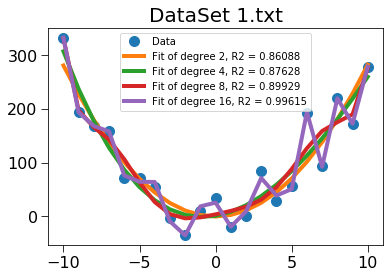

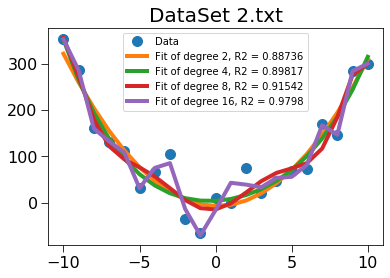

In [33]:
degrees = (2, 4, 8, 16)

#generate data
random.seed(0)
# genNoisyParabolicData(a, b, c, xVals,
#                      'Dataset 1.txt')
# genNoisyParabolicData(a, b, c, xVals,
#                      'Dataset 2.txt')

xVals1, yVals1 = getData('Dataset 1.txt')
models1 = genFits(xVals1, yVals1, degrees)
testFits(models1, degrees, xVals1, yVals1,
       'DataSet 1.txt')

pylab.figure()
xVals2, yVals2 = getData('Dataset 2.txt')
models2 = genFits(xVals2, yVals2, degrees)
testFits(models2, degrees, xVals2, yVals2,
        'DataSet 2.txt')



In [40]:
HTML('''
<li> What we're measuring is how well does the model perform on the data from which it learned/training data i.e. <b>Training Error</b></li>
<li> What we want to measure is how well it will do on other data.</li>
<li> Get model generated using Dataset 1, apply on Dataset 2, and vice versa.</li>
''')

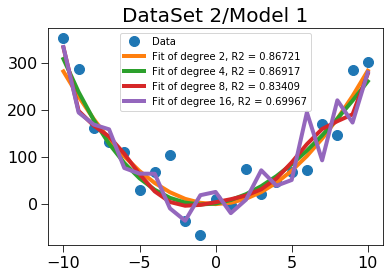

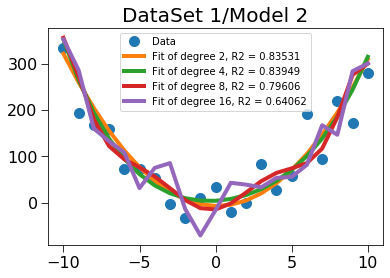

In [46]:
pylab.figure()
testFits(models1, degrees, xVals2, yVals2,
        'DataSet 2/Model 1')
pylab.figure()
testFits(models2, degrees, xVals1, yVals1,
        'DataSet 1/Model 2')


In [49]:
HTML('''
<li> Order 2 and Order 4 good fits, degree 16 fit is not a good fit.</li>
<li> If only R2 is used, model may not generalize well to other data. </li>
<li> If we only fit to training data, we may overfit. Too many degrees of freedom so model is fitting to noise.</li>
<li> Comparing Training and Testing R^2 for model 1:.</li>



''')

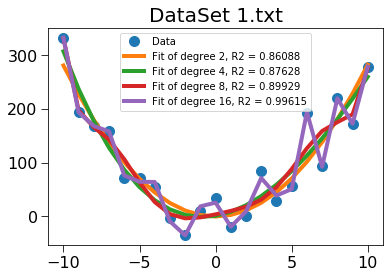

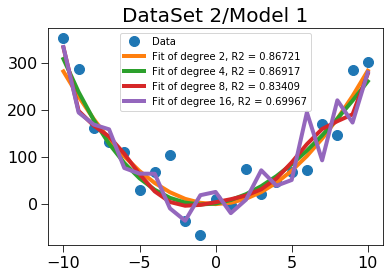

In [52]:
xVals1, yVals1 = getData('Dataset 1.txt')
models1 = genFits(xVals1, yVals1, degrees)
testFits(models1, degrees, xVals1, yVals1,
       'DataSet 1.txt')


pylab.figure()
testFits(models1, degrees, xVals2, yVals2,
        'DataSet 2/Model 1')


In [68]:
HTML('''<h3> Fitting Quadratic to a perfect line, what's the harm?</h3>


''')

a = -0.0 b = 1.0 c = 0.0
R-squared =  1.0


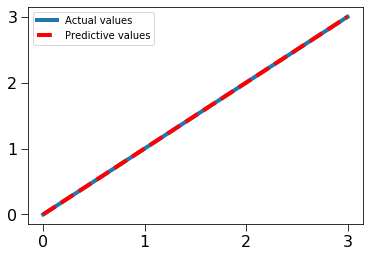

In [57]:
xVals = (0,1,2,3)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')

a,b,c = pylab.polyfit(xVals, yVals, 2)
print('a =', round(a, 4), 'b =', round(b, 4),
     'c =', round(c, 4))

estYVals = pylab.polyval((a,b,c), xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predictive values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')


R-squared =  1.0


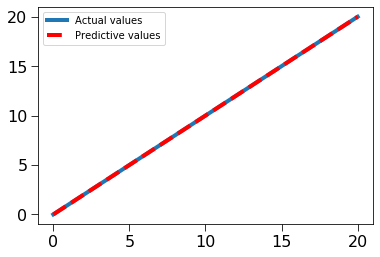

In [59]:
HTML('''<p> Predict Another Point using same model:</p>''')

#OPEN FOR SECOND DEMO
#
pylab.figure()
#Extend domain
xVals = xVals + (20,)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
estYVals = pylab.polyval((a,b,c), xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predictive values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')



In [61]:
HTML('''<p> Adding in some noise:''')

[0.025 0.955 0.005]
R-squared =  0.9999057936881771


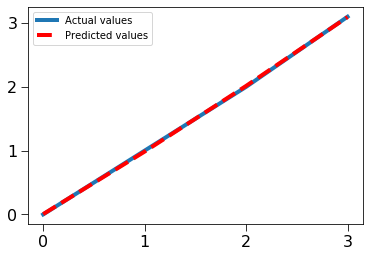

In [62]:
#Add some noise
#almost a line
pylab.figure()
xVals = (0,1,2,3)
yVals = (0,1,2,3.1)
pylab.plot(xVals, yVals, label = 'Actual values')
model = pylab.polyfit(xVals, yVals, 2)
print(model)
estYVals = pylab.polyval(model, xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predicted values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')



In [64]:
HTML('''<p> Predict another point using same model:''')

R-squared =  0.6405819002890212


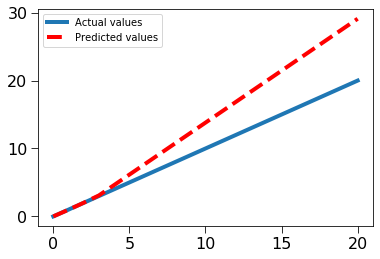

In [65]:
#OPEN FOR FOURTH DEMO

pylab.figure()
#Extend domain
xVals = xVals + (20,)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
estYVals = pylab.polyval(model, xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predicted values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')



In [67]:
HTML('''
<li> A small variation/noise is causing a high error </li>
<li>  </li>

''')

In [71]:
HTML('''
<h2> How to find model as simple as possible but still explains data </h2>
<li> Fit linear model. </li>
<li> Check R^2 and how well it does on new data. </li>
<li> Increase order of the model. </li>


''')

In [95]:
display(HTML('''
<h2> How to find model as simple as possible but still explains data </h2>

<img src="hookes.png" style = "width:600px;height:400px;">
<li> How is quadratic fit better even though Hooke's law claims linear relationship? </li>
<li> Hooke's law holds until elastic limit of spring is reached. So until that point linear model holds true. </li>
<li> So we should probably fit different models to different segments of data. </li>
<br>
<li><b> But if we did not have Hooke's law to guide the process, what do we use to control model complexity?</b></li>

<h2> Cross Validation </h2>
<br>
<li> Leave one out: predict on the one you left out. Average results </li>

<li> K-Fold cross validation for bigger dataset: leave out K-sized chunks.</li>
<li> Repeated Random Sampling </li>
'''))


Text(0.5, 1.0, 'Select U.S. Cities')

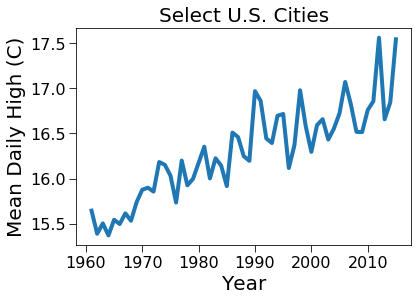

In [99]:
def getTempData():
    inFile = open('temperatures.csv')
    data = []
    for l in inFile:
        data.append(tempDatum(l))
    return data

def getYearlyMeans(data):
    years = {}
    for d in data:
        try:
            years[d.getYear()].append(d.getHigh())
        except:
            years[d.getYear()] = [d.getHigh()]
    for y in years:
        years[y] = sum(years[y])/len(years[y])
    return years

data = getTempData()
years = getYearlyMeans(data)
xVals, yVals = [], []
for e in years:
    xVals.append(e)
    yVals.append(years[e])
pylab.plot(xVals, yVals)
pylab.xlabel('Year')
pylab.ylabel('Mean Daily High (C)')
pylab.title('Select U.S. Cities')

In [101]:
display(HTML('''<h2> How to model this? </h2>'''))


def splitData(xVals, yVals):
    toTrain = random.sample(range(len(xVals)),
                            len(xVals)//2)
    trainX, trainY, testX, testY = [],[],[],[]
    for i in range(len(xVals)):
        if i in toTrain:
            trainX.append(xVals[i])
            trainY.append(yVals[i])
        else:
            testX.append(xVals[i])
            testY.append(yVals[i])
    return trainX, trainY, testX, testY

In [108]:
display(HTML('''<h3> 10 trials each of 4 models </h3>'''))

numSubsets = 10

# linear quadratic, cubic, quartic
dimensions = (1, 2, 3, 4)
rSquares = {}
for d in dimensions:
    rSquares[d] = []
    
display(HTML('''<h3> Train, Test and Report: </h3>'''))

for f in range(numSubsets):
    trainX, trainY, testX, testY = splitData(xVals, yVals)
    for d in dimensions:
        model = pylab.polyfit(trainX, trainY, d)
        estYVals = pylab.polyval(model, trainX)
        estYVals = pylab.polyval(model, testX)
        rSquares[d].append(rSquared(testY, estYVals))
print('Mean R-squares for test data')
for d in dimensions:
    mean = round(sum(rSquares[d])/len(rSquares[d]), 4)
    sd = round(numpy.std(rSquares[d]), 4)
    print('For dimensionality', d, 'mean =', mean,
         'Std =', sd)
#print(rSquares[1])

display(HTML('''
<h3> Inference: Linear model is the best </h3>
<br>
<li> Highest average R^2 </li>
<li> Smallest Deviation across trials </li>
<li> Simplest model </li>


'''))




Mean R-squares for test data
For dimensionality 1 mean = 0.7424 Std = 0.0593
For dimensionality 2 mean = 0.7469 Std = 0.0607
For dimensionality 3 mean = 0.7384 Std = 0.0621
For dimensionality 4 mean = 0.7293 Std = 0.0676
